# Project: Data Analysis into Medical Appointment No-Shows in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I will be analysing a dataset of medical appointments to determine whether certain factors may be influencing whether a patient shows up for their scheduled appointment. This dataset contains over 100,000 medical appointments in Brazil from May 2016 (source: Kaggle). Python with pandas, numpy and matplotlib libraries will be used for the data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

# Questions we are interested in:

- **Question 1:** Does age affect whether a person is likely to no show?
- **Question 2:** Which neighbourhood had the highest number of no show appointments?
- **Question 3:** Are patients more likely to attend an appointment if they receive a SMS?
- **Question 4:** Are patients eligible for a scholarship more likely to attend their appointment?
- **Question 5:** Are males or females more likely to miss their appointment?

<a id='wrangling'></a>
## Data Wrangling

In this section, I will be loading the data, checking for cleanliness and then trimming and cleaning the dataset so it is ready for analysis.


### General Properties

The dataset has been downloaded as a .csv file from Kaggle. It will be loaded then some general properties of the data will be inspected.

In [2]:
df = pd.read_csv('noshowappointments_may_2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Above shows that we have 110,527 entries, 14 columns of data (one is the index).
Of the 13 columns containing useful data, the data they contain are as following:

- PatientId - Identification of a patient
- AppointmentID - Identification of every appointment
- Gender - Male or female
- ScheduledDay - When the appointment to see a doctor is scheduled
- AppointmentDay - The day the appointment to see a doctor was made
- Age - How old the patient is
- Neighbourhood - Where the appointment will take place
- Scholarship - Whether the patient is eligible for financial aid through Bolsa Família
- Hipertension - Whether the patient suffers from hypertension
- Diabetes - Whether the patient suffers from diabetes
- Alcoholism - Whether the patient suffers from alcoholism
- Handcap - Whether the patient is handicapped
- SMS_received - Has at least 1 message been sent to the patient
- No-Show - Did the patient no-show? (No indicates the patient did attend their appointment. Yes indicates a no show)

It also shows us that we do not have any missing data as there are 110,527 entries for every column listed. Next, I will be looking at some summary statistics for this dataset.

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The summary table above shows that the average patient's age is 37 years old with the youngest being listed as -1 years old (will have to investigate how many patients have been listed with a negative age) and the oldest being 115 years old. The majority of patients are between 18 and 55 years old.

It also shows us that for columns scholarship, hipertension, diabetes, alcoholism and SMS_received, the min and max values are 0 and 1 suggesting the has been recorded on a true or false basis where 1 = True and 0 = False.

Despite handcap being listed as a true or false on the Kaggle website, the min and max values are listed between 0 and 4 suggesting the values indicate the 5 varying degrees of handicap.

Less than 10% of the patients are eligible for scholarship. 

32% of patients received at least one SMS about their scheduled appointment.

Next, by examining the number of unique values in our dataset, we can begin to plan how the data should be cleaned.

In [6]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

This shows that some patients have attended multiple appointments. AppointmentDay only has 27 values whilst ScheduledDay has 103,549. This suggests that when recording data about when an appointment was made, the time of the booking was not recorded whilst the time of the appointment was. 

Data has been collected from a total of 81 neighbourhoods.

Scholarship, hipertension, diabetes, alcoholism, SMS_received and no-show all have just two values, this therefore corresponds with the table above that shows they can only contain the values 0 or 1.

Handcap has 5 unique values. As the datatype for Handcap is int and the min and max values were 0 to 4. This indicates that Handcap is measured on a scale from 0-4.

## Data Cleaning

The dataset now needs to be cleaned so that we can extract meaningful data from it to perform the data analysis.

**Dropping columns that are not useful**

I will first be dropping the columns that are not useful for this investigation. PatientId and appointmentID are not useful as we are looking at the factors affecting no-shows rather than the characteristics of specific patients.

In [7]:
df.drop(['PatientId','AppointmentID'], axis = 1, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


**Renaming column names**

Columns will be renamed to make it easier. They will all be converted to lowercase and underscores instead of hyphens. I will also be renaming the hipertension and handcap columns to hypertension and handicap respectively.

In [9]:
df.rename(columns = lambda x : x.strip().lower().replace("-","_"),inplace=True)

In [10]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df = df.rename(columns={'hipertension':'hypertension','handcap':'handicap'})

In [12]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Converting scheduledday and appointmentday datatypes from string to datetime**

Scheduledday and appointmentday currently both have the datatype string. These need to be converted to date time format instead to be more useful incase we want to perform analysis based on date and time.

In [13]:
df.scheduledday = df['scheduledday'].astype('datetime64[ns]')
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   gender          110527 non-null  object        
 1   scheduledday    110527 non-null  datetime64[ns]
 2   appointmentday  110527 non-null  object        
 3   age             110527 non-null  int64         
 4   neighbourhood   110527 non-null  object        
 5   scholarship     110527 non-null  int64         
 6   hypertension    110527 non-null  int64         
 7   diabetes        110527 non-null  int64         
 8   alcoholism      110527 non-null  int64         
 9   handicap        110527 non-null  int64         
 10  sms_received    110527 non-null  int64         
 11  no_show         110527 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(4)
memory usage: 10.1+ MB


In [15]:
df.appointmentday = df['appointmentday'].astype('datetime64[ns]')

In [16]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   gender          110527 non-null  object        
 1   scheduledday    110527 non-null  datetime64[ns]
 2   appointmentday  110527 non-null  datetime64[ns]
 3   age             110527 non-null  int64         
 4   neighbourhood   110527 non-null  object        
 5   scholarship     110527 non-null  int64         
 6   hypertension    110527 non-null  int64         
 7   diabetes        110527 non-null  int64         
 8   alcoholism      110527 non-null  int64         
 9   handicap        110527 non-null  int64         
 10  sms_received    110527 non-null  int64         
 11  no_show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


**Handling negative age values**

As seen in the summary statistics before, the minimum age in the dataset was -1 years old. As it is impossible to have a negative age, I will be examining further what values have been entered into the age column.

In [18]:
df.age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

This shows that there is just one entry of a negative age. This data will therefore be dropped.

In [19]:
neg_age = df[df.age<0]
df.drop(neg_age.index, inplace=True)

In [20]:
df.age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64

This check confirms that the negative age has been removed.

**Neighbourhood check**

The neighbourhood column lists all the different locations that the appointment can take place. Below it shows that there were 81 locations and the locations are also listed.

In [21]:
df.neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

In [22]:
df.neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

**True or false columns**

The next set of columns list values as 0 or 1 with 0 indicating false and 1 indicating true. I will be examing each of these columns to ensure that they only contain the value 0 or 1.

In [23]:
df.scholarship.value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

In [24]:
df.hypertension.value_counts()

0    88725
1    21801
Name: hypertension, dtype: int64

In [25]:
df.diabetes.value_counts()

0    102583
1      7943
Name: diabetes, dtype: int64

In [26]:
df.alcoholism.value_counts()

0    107166
1      3360
Name: alcoholism, dtype: int64

In [27]:
df.handicap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

On the source website, Kaggle, handicap is listed as true or false despite having 5 different values. As such, any value that is not 0 will be converted to 1 indicated the patient is handicap as we are not told how the numbers differ from each other.

**Converting handicap values**

In [28]:
df.loc[df.handicap > 0, 'handicap'] = 1
df.handicap.value_counts()

0    108285
1      2241
Name: handicap, dtype: int64

In [29]:
df.sms_received.value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

The column for no_show is currently being recorded as Yes or No. It would be easier to store this data as a boolean just like the other columns for consistency. I will therefore be converting it to 0 and 1. As 'No' means they did show and 'Yes' means they didn't show, I will be making No = 0 and Yes = 1 so that a 1 in the no_show column indicates that the patient did not show up to their appointment.

**Converting no_show values to 0 and 1**

In [30]:
df['no_show'] = df['no_show'].replace({'No':0,'Yes':1})
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [31]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,0.201934
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can identify out of 110,527 how many were no show appointments.

In [32]:
df.no_show.value_counts()

0    88207
1    22319
Name: no_show, dtype: int64

In [33]:
df.no_show.mean()*100

20.193438647919944

Patients attended 88,207 appointments but 22,319 were no shows. Therefore, 20% of appointments result in no shows.

**Duplicate entries**

Now the values in the dataset have been checked, the dataset should be checked for duplicate entries.

In [34]:
df.duplicated().sum()

635

There are 635 duplucate entries, these will be dropped.

In [35]:
df = df.drop_duplicates()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109891 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   gender          109891 non-null  object        
 1   scheduledday    109891 non-null  datetime64[ns]
 2   appointmentday  109891 non-null  datetime64[ns]
 3   age             109891 non-null  int64         
 4   neighbourhood   109891 non-null  object        
 5   scholarship     109891 non-null  int64         
 6   hypertension    109891 non-null  int64         
 7   diabetes        109891 non-null  int64         
 8   alcoholism      109891 non-null  int64         
 9   handicap        109891 non-null  int64         
 10  sms_received    109891 non-null  int64         
 11  no_show         109891 non-null  int64         
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 10.9+ MB


This shows that the duplicated rows have now been dropped as there were 110,526 entries and now there are 109,891.

<a id='eda'></a>
## Exploratory Data Analysis

Firstly, I am creating a histogram of the entire dataframe. This allows us to quickly visualise our data before a more detailed analysis is performed.

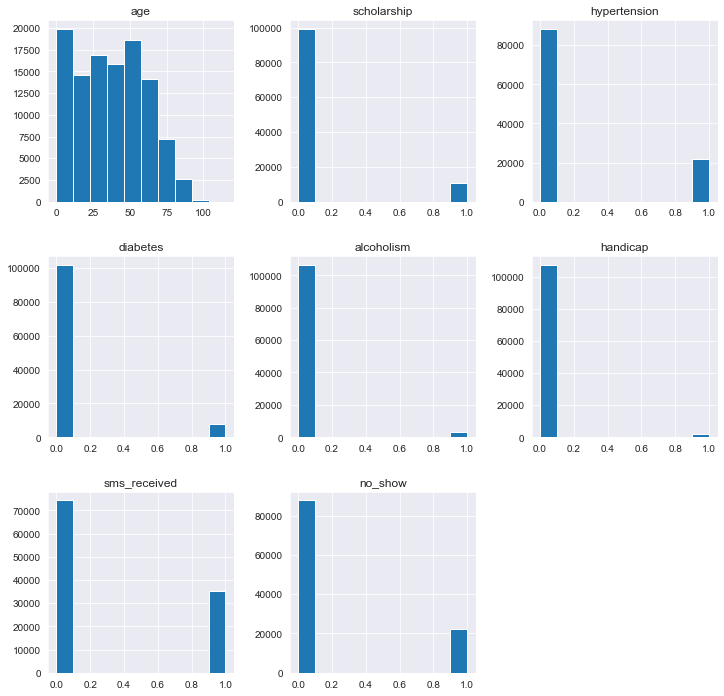

In [37]:
df.hist(figsize=(12,12));

>The above histograms initially show us that:
>- The majority of patients are below 60 years old.
>- The majority of patients are not eligible for a scholarship.
>- The majority of patients do not suffer from hypertension, diabetes, alcoholism or handicap.
>- The majority of patients have not received a SMS.
>- The majority of patients do attend their appointment.

### Research Question 1: Does age affect whether a person is likely to no show?

In [38]:
# Creating a mask of the people that did show to their appointment and those who didn't.
show = df.no_show == 0
no_show = df.no_show == 1

First, I will see the average age of patient who didn't attend their appointment vs the ones who do attend.

In [39]:
df.age[no_show].mean()

34.28391709656982

In [40]:
df.age[show].mean()

37.796122697709386

The mean age of patients that no_show are 34 years old whilst the mean age of those who show is 37 years old.

**Graph to show the number of no show and show appointments by age**

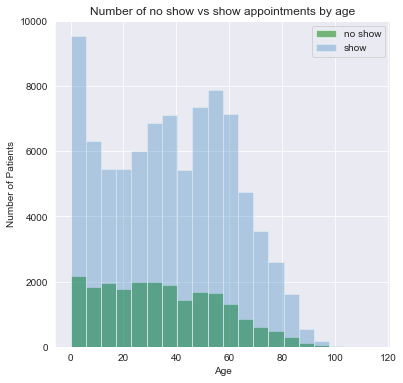

In [41]:
# Plot bars
df.age[no_show].hist(alpha = 0.5, bins=20,color = 'green', label = 'no show', figsize=(6,6))
df.age[show].hist(alpha = 0.3 , bins=20, label = 'show')

# Labels and titles
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Number of no show vs show appointments by age')
plt.legend();

>The graph shows us that there are a lot of younger patients as the graph is skewed to the right. For the patients aged around 0-5, 9,500 appointments were attended whilst 2,200 were missed. This means around 19% of appointments were no shows which is slightly under the mean which is 21%.
It also shows that patients aged around 20 were more likely to no show. This is beacuse 1750 were no shows and 5,500 were shows. This results in over 24% of appointments being no shows. 
When looking at the older patients, for example those around 80, 500 were no shows whilst 2,500 were shows. This means that only 16% of appointments were no shows for those around 80 years old. 
Therefore, this graph suggests that age is a factor that influences whether an appointment is missed. Teenagers are more likely to miss their appointment whilst the older patients are more likely to attend.

### Research Question 2: Which neighbourhood had the highest number of no show appointments?

**Identifying which appointments were show and which were no show**

In [42]:
total = df.groupby('neighbourhood')['no_show'].count()
total

neighbourhood
AEROPORTO                 8
ANDORINHAS             2194
ANTÔNIO HONÓRIO         271
ARIOVALDO FAVALESSA     280
BARRO VERMELHO          422
                       ... 
SÃO JOSÉ               1963
SÃO PEDRO              2431
TABUAZEIRO             3123
UNIVERSITÁRIO           152
VILA RUBIM              851
Name: no_show, Length: 81, dtype: int64

As there are 81 neighbourhoods listed, it would be much easier to compare the neighbourhoods if the values were sorted in descending order.

In [43]:
no_show_count = df[no_show].groupby('neighbourhood')['no_show'].count()
no_show_count.sort_values(ascending=False, inplace=True)
no_show_count

neighbourhood
JARDIM CAMBURI                 1429
MARIA ORTIZ                    1219
ITARARÉ                         902
RESISTÊNCIA                     885
JESUS DE NAZARETH               695
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: no_show, Length: 80, dtype: int64

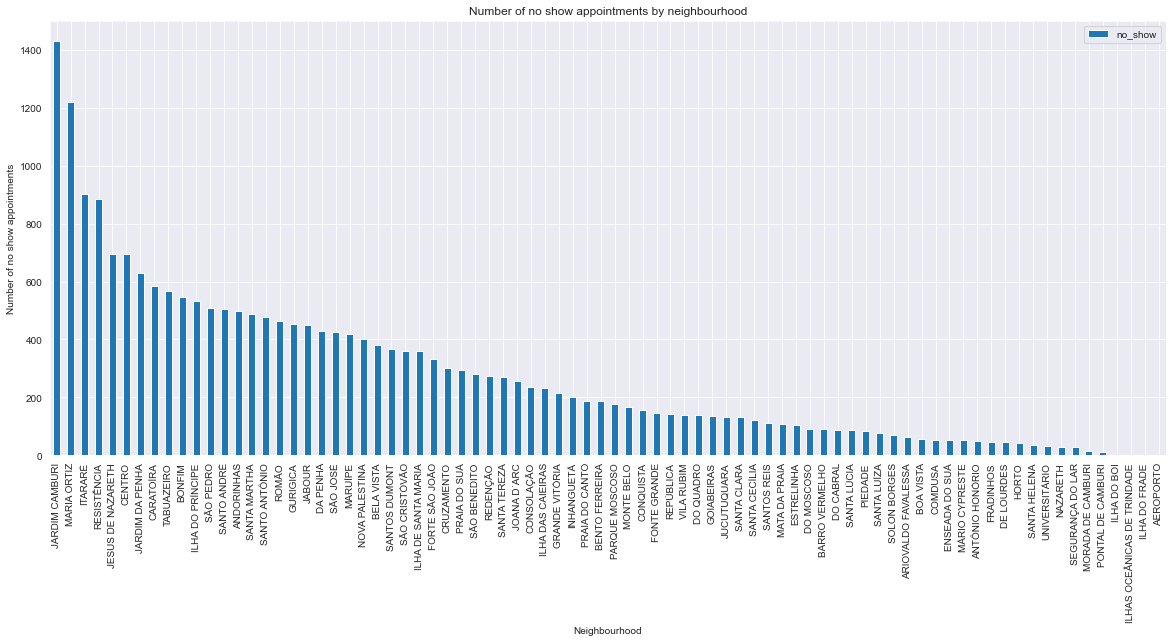

In [44]:
no_show_count.plot(kind='bar', figsize=(20,8))
plt.xlabel('Neighbourhood')
plt.ylabel('Number of no show appointments')
plt.title('Number of no show appointments by neighbourhood')
plt.legend();

This bar chart shows us that the neighbourhood with the most no shows is Jardim Camburi whilst the one with the least no shows is Aeroporto. This however does not show us how many total appointments were made in each neighbourhood. It could be that the neighbourhoods with the lowest number of no shows are actually due to fewer appointments being made. It would therefore be more useful to find out the proportion of appointments that resulted in no shows. This would allow us to compare neighbourhoods with different numbers of appointments more easily.

**Proportion of no show appointments by neighbourhood**

The proportion is calculated by dividing the number of no show appointments by the total number of appointments in each neighbourhood.

In [45]:
no_show_proportions = no_show_count / total
no_show_proportions

neighbourhood
AEROPORTO              0.125000
ANDORINHAS             0.226527
ANTÔNIO HONÓRIO        0.184502
ARIOVALDO FAVALESSA    0.221429
BARRO VERMELHO         0.215640
                         ...   
SÃO JOSÉ               0.217524
SÃO PEDRO              0.209379
TABUAZEIRO             0.181876
UNIVERSITÁRIO          0.210526
VILA RUBIM             0.165687
Name: no_show, Length: 81, dtype: float64

In [46]:
no_show_proportions.sort_values(ascending=False, inplace=True)
no_show_proportions

neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    1.000000
SANTOS DUMONT                  0.287736
SANTA CECÍLIA                  0.274554
SANTA CLARA                    0.263473
ITARARÉ                        0.259942
                                 ...   
SOLON BORGES                   0.147122
MÁRIO CYPRESTE                 0.141689
AEROPORTO                      0.125000
ILHA DO BOI                    0.085714
PARQUE INDUSTRIAL                   NaN
Name: no_show, Length: 81, dtype: float64

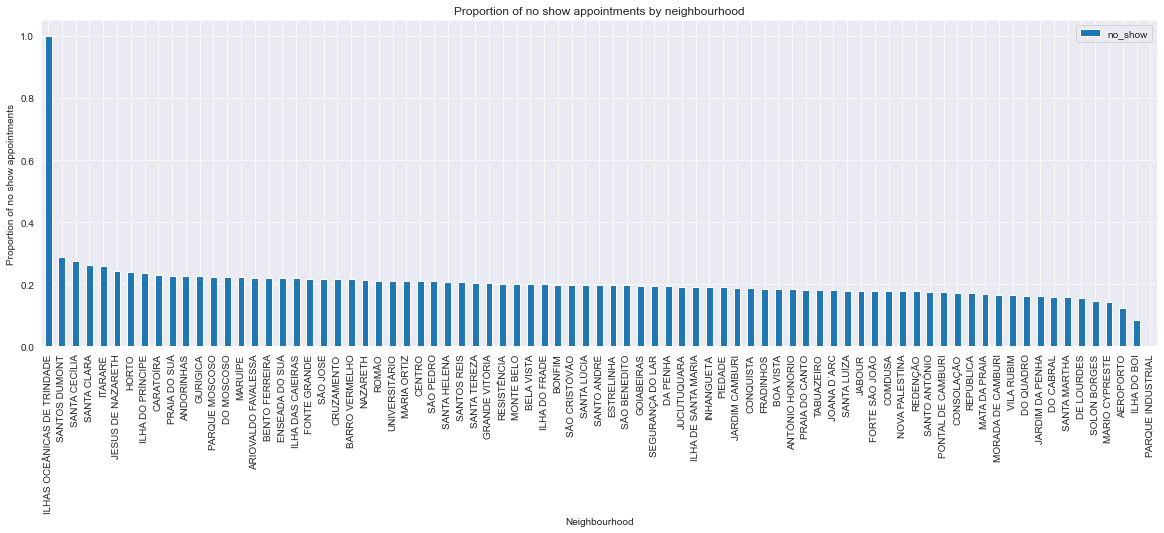

In [47]:
no_show_proportions.plot(kind='bar', figsize=(20,6))

plt.xlabel('Neighbourhood')
plt.ylabel('Proportion of no show appointments')
plt.title('Proportion of no show appointments by neighbourhood')
plt.legend();

In [48]:
no_show_proportions.mean()*100

20.751851341797483

The mean no show proportion is 21%.

The bar chart above shows that Ilhas Oceânicas de Trindade had 100% no show appointments. This appears to be an outlier as well as Parque Industrial that has no no show appointments. The majority of neighbourhoods had around 20% no show appointments.

**Identifying the number of appointments made in outliers**

In [49]:
df.query('neighbourhood == "ILHAS OCEÂNICAS DE TRINDADE"')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
48754,F,2016-04-14 12:25:43,2016-05-13,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1
48765,F,2016-04-14 12:26:13,2016-05-13,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1


This query shows us that there were only two appointments at Ilhas Oceânicas de Trindade and both resulted in no show appointments.

In [50]:
df.query('neighbourhood == "PARQUE INDUSTRIAL"')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
75199,F,2016-05-05 10:48:59,2016-05-05,17,PARQUE INDUSTRIAL,0,0,0,0,0,0,0


This query shows us that there was only one appointment at Parque Industrial and this was not a no show appointment.

> When comparing the number of no show appointments in each neighbourhood, Jardim Camburi had the most. However, as not all neighbourhoods had the same number of appointments, the proportion of no show appointments were compared for each neighbourhood. The mean proportion of no shows was 21% and the majority of the neighbourhoods were around the 15-25% region. There were some outliers however. All Ilhas Oceânicas de Trindade appointments were no shows and all Parque Industrial were shows. When examined more carefully, it was found that this was due to the very small sample size of 2 and 1 respectively. 

### Research Question 3: Are patients more likely to attend an appointment if they receive a SMS?

In [51]:
df.sms_received.value_counts()

0    74409
1    35482
Name: sms_received, dtype: int64

In [52]:
df.sms_received.mean()*100

32.288358464296444

> Above shows the total number of patients not receiving a SMS and patients receiving a SMS. Also only 32% of patients receive a SMS before their appointment.

**Calculating show and no show appointments for sms received vs not received**

In [53]:
sms_yes = df.query('sms_received =="1"')
sms_no = df.query('sms_received =="0"')

In [54]:
sms_yes_count = sms_yes.groupby('sms_received').no_show.value_counts()
sms_yes_count

sms_received  no_show
1             0          25698
              1           9784
Name: no_show, dtype: int64

In [55]:
sms_no_count = sms_no.groupby('sms_received').no_show.value_counts()
sms_no_count

sms_received  no_show
0             0          62095
              1          12314
Name: no_show, dtype: int64

In [56]:
ind = np.arange(len(sms_yes_count))
width = 0.35 

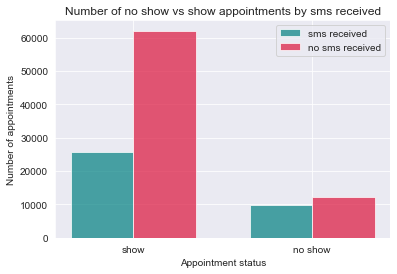

In [57]:
# plot bars
sms_yes_bars = plt.bar(ind, sms_yes_count, width, color='teal', alpha=.7, label='sms received')
sms_no_bars = plt.bar(ind + width, sms_no_count, width, color='crimson', alpha=.7, label='no sms received')


#title and labels
plt.ylabel('Number of appointments')
plt.xlabel('Appointment status')
plt.title('Number of no show vs show appointments by sms received')
locations = ind + width/2 
labels = ['show','no show']
plt.xticks(locations,labels)
plt.legend();

This graph shows us that a significant number of patients show up to their appointment despite not receiving a SMS. However, as only 32% of patients received a sms,  I will be looking at the proportion of appointments attended by patients instead.

In [58]:
sms_total = df.groupby('sms_received')['no_show'].count()
sms_total

sms_received
0    74409
1    35482
Name: no_show, dtype: int64

In [59]:
sms_yes_total = sms_yes_count / sms_total
sms_no_total = sms_no_count / sms_total

In [60]:
sms_yes_total

sms_received  no_show
1             0          0.724255
              1          0.275745
Name: no_show, dtype: float64

In [61]:
sms_no_total

sms_received  no_show
0             0          0.834509
              1          0.165491
Name: no_show, dtype: float64

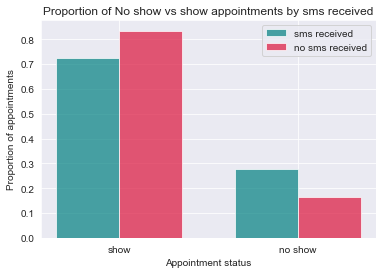

In [62]:
# plot bars
sms_yes_bars = plt.bar(ind, sms_yes_total, width, color='teal', alpha=.7, label='sms received')
sms_no_bars = plt.bar(ind + width, sms_no_total, width, color='crimson', alpha=.7, label='no sms received')


#title and labels
plt.ylabel('Proportion of appointments')
plt.xlabel('Appointment status')
plt.title('Proportion of No show vs show appointments by sms received')
locations = ind + width/2 
labels = ['show','no show']
plt.xticks(locations,labels)
plt.legend();

> Therefore, if a patient doesn't receive a sms, it doesn't appear to influence whether they will attend the appointment as in fact, a higher proportion of patients attended their appointment despite not receiving a sms.

### Research Question 4: Are patients eligible for a scholarship more likely to attend their appointment?

In [63]:
df.scholarship.mean()*100

9.82883038647387

9.8% of patients were eligible for a scholarship. 

**Calculating the proportion of show and no show appointments depending on scholarship eligibility**

In [64]:
df.scholarship.value_counts()

0    99090
1    10801
Name: scholarship, dtype: int64

In [65]:
eligible = df.query('scholarship == "1"')
not_eligible = df.query('scholarship == "0"')

In [66]:
eligible_count = eligible.groupby('scholarship').no_show.value_counts()
eligible_count

scholarship  no_show
1            0          8245
             1          2556
Name: no_show, dtype: int64

In [67]:
not_eligible_count = not_eligible.groupby('scholarship').no_show.value_counts()
not_eligible_count

scholarship  no_show
0            0          79548
             1          19542
Name: no_show, dtype: int64

In [68]:
scholarship_total = df.groupby('scholarship')['no_show'].count()
scholarship_total

scholarship
0    99090
1    10801
Name: no_show, dtype: int64

In [69]:
eligible_proportion = eligible_count/scholarship_total
eligible_proportion

scholarship  no_show
1            0          0.763355
             1          0.236645
Name: no_show, dtype: float64

In [70]:
not_eligible_proportion = not_eligible_count/scholarship_total
not_eligible_proportion

scholarship  no_show
0            0          0.802785
             1          0.197215
Name: no_show, dtype: float64

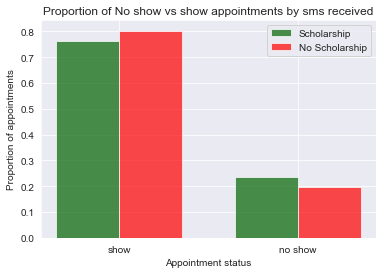

In [71]:
# Plot bars
eligible_bars = plt.bar(ind, eligible_proportion, width, color='darkgreen', alpha=.7, label='Scholarship')
not_eligible_bars = plt.bar(ind + width, not_eligible_proportion, width, color='red', alpha=.7, label='No Scholarship')


# Title and labels
plt.ylabel('Proportion of appointments')
plt.xlabel('Appointment status')
plt.title('Proportion of No show vs show appointments by sms received')
locations = ind + width/2 
labels = ['show','no show']
plt.xticks(locations,labels)
plt.legend();

> From the graph above, it shows that those with a scholarship were slightly morelikely to no show than those without a scholarship. However, there is not a signficant difference in the proportion.

### Research Question 5: Are males or females more likely to miss their appointment?

In [72]:
df.gender.value_counts()

F    71416
M    38475
Name: gender, dtype: int64

In [73]:
female = df.query('gender=="F"')
male = df.query('gender=="M"')

In [74]:
female_count = female.groupby('gender').no_show.value_counts()
male_count = male.groupby('gender').no_show.value_counts()
total = df.groupby('gender')['no_show'].count()
total

gender
F    71416
M    38475
Name: no_show, dtype: int64

In [75]:
female_count

gender  no_show
F       0          56961
        1          14455
Name: no_show, dtype: int64

In [76]:
female_prop = female_count/total
female_prop

gender  no_show
F       0          0.797594
        1          0.202406
Name: no_show, dtype: float64

In [77]:
male_prop = male_count/total
male_prop

gender  no_show
M       0          0.801352
        1          0.198648
Name: no_show, dtype: float64

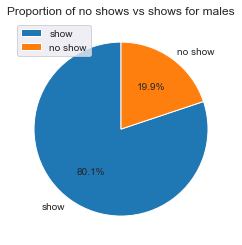

In [78]:
labels= ['show','no show']
plt.pie(male_prop,labels=labels,autopct = '%1.1f%%',startangle=90)
plt.title('Proportion of no shows vs shows for males')

plt.legend();

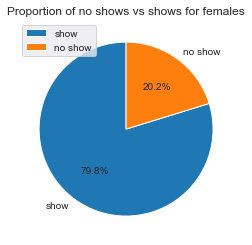

In [79]:
labels= ['show','no show']
plt.pie(female_prop,labels=labels, autopct = '%1.1f%%',startangle=90)
plt.title('Proportion of no shows vs shows for females')

plt.legend();

> The pie charts above show that gender does not seem be correlated with more missed appointments. 19.9% of males missed their appointments whilst 20.2% of females missed their appointments.

<a id='conclusions'></a>
## Conclusions

In conclusion, after analysing a dataset containing over 100,000 appointments in Brazil, over 20% resulted in no show appointments. 

When examining whether age influences whether the appointment was a no show, it was found that the youngest patients had around the average rate of no shows whilst those around 20 had a relatively high level of no shows. The older patients around 80 years old had a high attendance to appointments, only 16% were no shows.

When examining the number of no show appointments based on neighbourhood, it was found that Jardim Camburi had the highest number of no show appointments. The proportion of no show appointments was then calculated and it was found that most neighbourhoods had a proportion of 15-25% but there were a few outliers. These outliers were abnormally high or low because of the small data size. 

SMS did not appear to have an effect on whether a patient was going to miss an appointment. 

Patients eligible for a scholarship were slightly more likely to miss their appointment compared to those without.

Gender does not seem to have an effect on the number of no show appointments. Both males and females had around 20% of patients missing their appointments.

### Limitations

There are some limitations with the dataset. Firstly, the data only contains information about appointments made for the month of May 2016. Despite there being over 100,000 rows of data, if the dataset included data from the whole year, it may be easier to identify trends, especially for the proportion of no shows by neighbourhood as some neighbourhoods had very few appointments that month. More data is required in neighbourhods with a small sample size to enable us to more clearly identify whether there is a significant increase or decrease in the proportion of no show appointments. With a larger dataset, statistical analysis could be performed to examine the correlations observed further.

There are more health factors that could be recorded for example some conditions may require more urgent medical attention and therefore those suffering from that condition may be more likely to attend their appointment compared to those with less urgent issues.

There may also be other factors affecting whether a patient no shows such as have they missed their appointment because they were late. Perhaps those using public transport were more likely to miss their appointment compared to those who drove. Perhaps patients living further away were more likely to no show. Weather may also have an impact. Additional variables could also be tracked to see whether they could be affecting the number of no show appointments.

The dataset only records whether a patient received at least one SMS. It does not tell us when they received it. It could be that the SMS was sent as a confirmation as a booking or it could be a reminder message for the patient. It also doesn't say how many SMS were sent, if the number of SMS sent was recorded, this could be investigated further.

**References**

Kaggle datasource : https://www.kaggle.com/joniarroba/noshowappointments